In [121]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df=pd.read_csv('Telco-Customer-Churn.csv')

In [123]:
df.head(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [125]:
# replacing blank with 0 as tenure is 0 in that case so total charges must be 0.

In [126]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")
df['TotalCharges']=df['TotalCharges'].astype("float")

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [128]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [129]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [130]:
df.duplicated().sum() #checking based on entire row

0

In [131]:
df['customerID'].duplicated().sum() #checking based on some unique value

0

In [132]:
def conv(value):             
    if value ==1:
        return "Yes"
    else:
        return "No"
df['SeniorCitizen']=df["SeniorCitizen"].apply(conv)

In [133]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [134]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [135]:
df.rename(columns={'customerID':'CustomerID', 'gender': 'Gender', 'tenure': 'Tenure'},inplace=True)

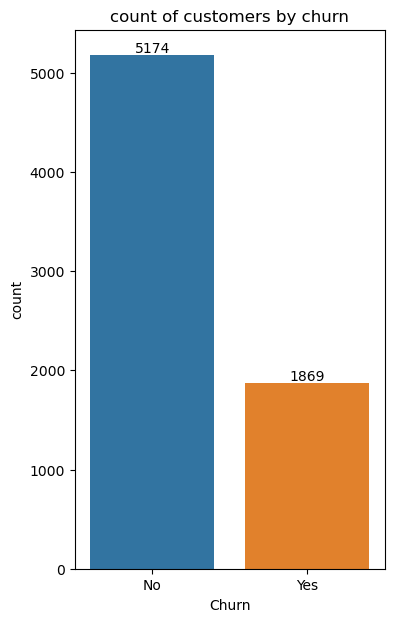

In [136]:
plt.figure(figsize=(4,7))
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
# # or do this
# for bars in ax.containers:
#   ax.bar_label(bars)
plt.title("count of customers by churn")
plt.show()

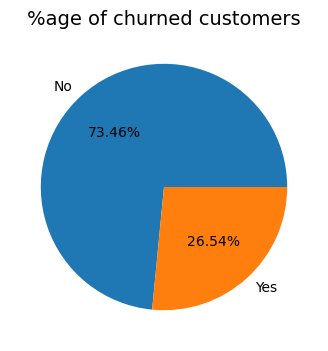

In [137]:
plt.figure(figsize=(4,4))
plt.title("%age of churned customers", fontsize=14)
gb=df.groupby('Churn').agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index,autopct="%1.2f%%")
plt.show()

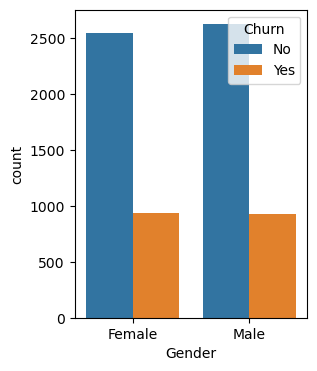

In [147]:
plt.figure(figsize=(3,4))
sns.countplot(x='Gender',data=df,hue="Churn")
plt.show()

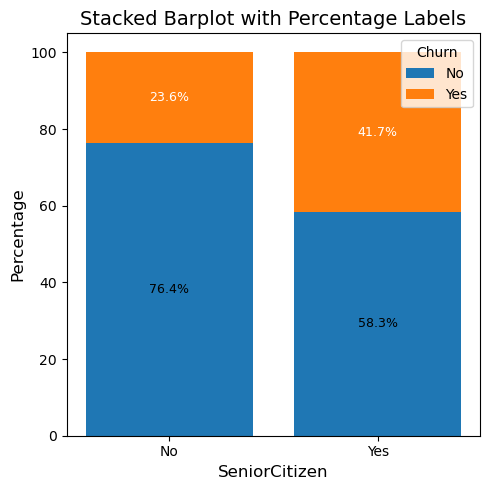

In [149]:
# Step 1: Group data and calculate counts
grouped_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Step 2: Convert counts to percentages
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Step 3: Create the stacked barplot
fig, ax = plt.subplots(figsize=(5, 5))
# Initialize bottom values for stacking
bottom_values = [0] * len(percentage_data)

# Plot each Churn category as a separate layer
for churn_category in percentage_data.columns:
    ax.bar(
        percentage_data.index, 
        percentage_data[churn_category], 
        bottom=bottom_values, 
        label=churn_category
    )
    # Update the bottom values for the next category
    bottom_values = [i + j for i, j in zip(bottom_values, percentage_data[churn_category])]

# Step 4: Add percentage labels
for i, senior_category in enumerate(percentage_data.index):
    cumulative_height = 0
    for churn_category in percentage_data.columns:
        height = percentage_data.loc[senior_category, churn_category]
        if height > 0:  # Add labels only for non-zero heights
            ax.text(
                x=i, 
                y=cumulative_height + height / 2, 
                s=f"{height:.1f}%", 
                ha='center', 
                va='center', 
                color="white" if cumulative_height + height / 2 > 50 else "black",
                fontsize=9
            )
        cumulative_height += height

# Step 5: Customize the plot
ax.set_xlabel("SeniorCitizen", fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)
ax.set_title("Stacked Barplot with Percentage Labels", fontsize=14)
ax.legend(title="Churn", loc="upper right")
plt.tight_layout()

# Step 6: Display the plot
plt.show()


In [ ]:
# senior citizens have churned more than that of non senior citizens

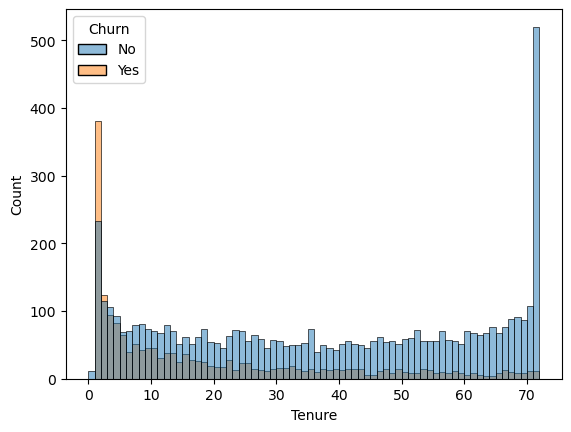

In [154]:
sns.histplot(x='Tenure',data=df,bins=72,hue='Churn')
plt.show()

**# people who have used services for a long time have not churned**

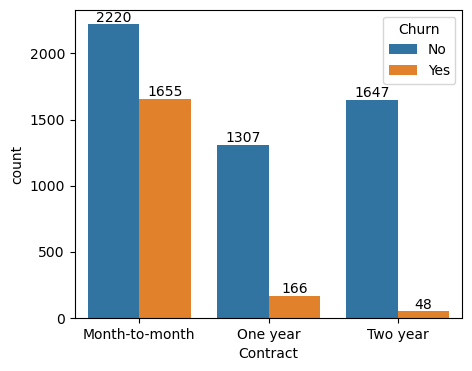

In [161]:
plt.figure(figsize=(5,4))
ax=sns.countplot(x='Contract',data=df,hue="Churn")
# ax.bar_label(ax.containers[0]) # here it doesn't work
for bars in ax.containers:
  ax.bar_label(bars)
plt.show()

In [162]:
# people who have month-to-month contract are more likely to churn than those having longer contract

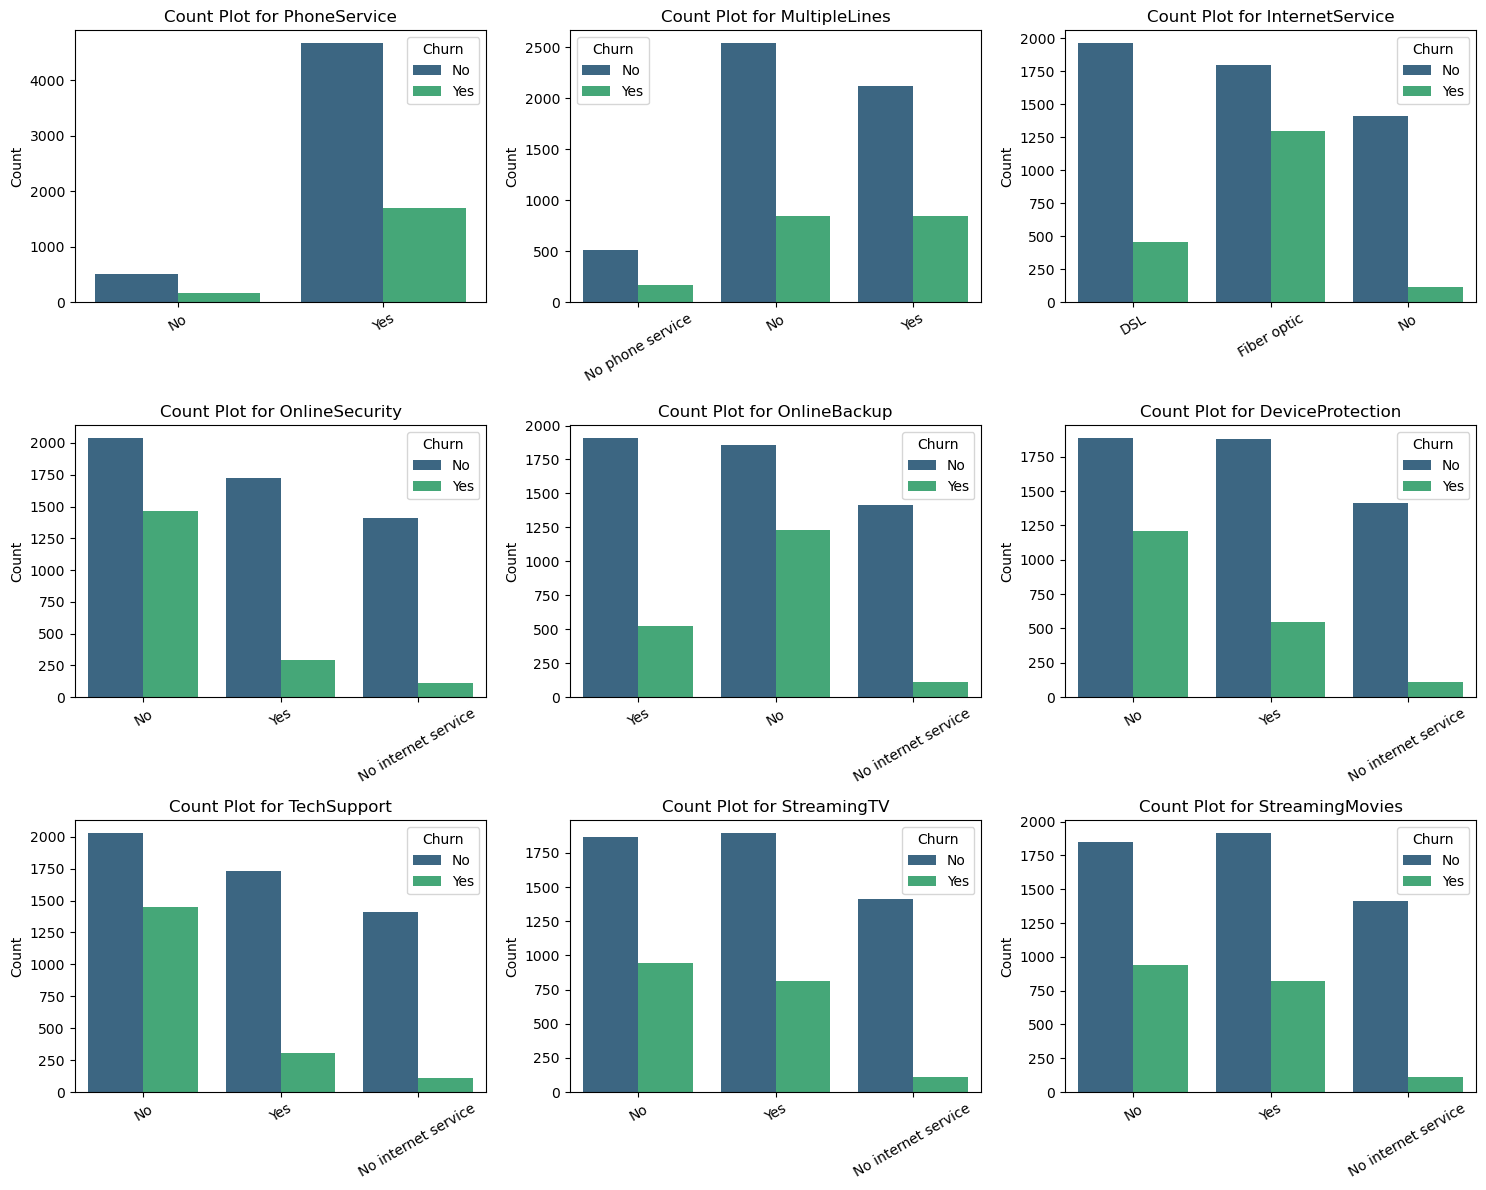

In [166]:
# List of columns to plot
columns_to_plot = [
    'PhoneService', 'MultipleLines', 'InternetService', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # Flatten axes for easy iteration

# Loop through each column and create a countplot
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=df, x=column, ax=axes[i],hue=df['Churn'], palette="viridis")
    axes[i].set_title(f"Count Plot for {column}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count", fontsize=10)
    axes[i].tick_params(axis='x', rotation=30)  # Rotate x-axis labels for better readability

# Remove any unused subplots (if columns < total grid size)
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

 Notable patterns include higher churn for customers using fiber optic for internet and those lacking additional services like online security, backup, and tech support. Conversely, customers with "No" services or DSL internet tend to churn less frequently. 

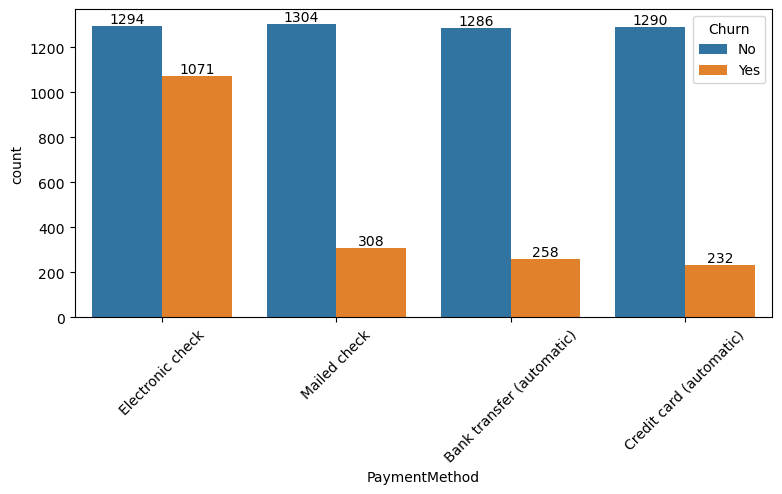

In [177]:
plt.figure(figsize=(9,4))
ax=sns.countplot(x='PaymentMethod',data=df,hue="Churn")
for bars in ax.containers:
  ax.bar_label(bars)
# # or use this
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.show()

customer is likely to churn if he/she is doing playment through electronic check.